In [ ]:
pip install scopesim_templates


In [ ]:
pip install scopesim

In [ ]:
import numpy as np
from scopesim_templates.stellar import cluster


src = cluster(mass=1E3, distance=50000, core_radius=1)

imf - sample_imf: Setting maximum allowed mass to 1000
imf - sample_imf: Loop 0 added 1.09e+03 Msun to previous total of 0.00e+00 Msun


100%|██████████████████████████████████████████| 609/609 [00:00<00:00, 135kB/s]
100%|██████████████████████████████████████| 3.18k/3.18k [00:00<00:00, 804kB/s]


In [ ]:
src.fields


[<Table length=2434>
          x                   y           ...        masses        spec_types
        arcsec              arcsec        ...       solMass                  
       float64             float64        ...       float64           str7   
 ------------------- -------------------- ... -------------------- ----------
  0.7047941071430335 -0.34193400839906835 ... 0.023450818028910993        M6V
   3.017163801660643   -1.531947677274888 ...   0.5030213194041789        M1V
   5.545342770168751  -0.5059378004225308 ...   0.6887993545486397        K5V
 0.04337484405135695  0.47394950595035895 ...  0.16592467519086804        M5V
 -0.1695198026107141    2.689008599028229 ...   0.4981528843145076        M1V
   2.903227971744357 -0.42880293404815345 ... 0.030385458123976427        M6V
  2.9147725521817955   1.4290979035892837 ...  0.12048133658240405        M5V
  2.1879322601012166   1.7393082707150282 ...  0.33768446357534043        M3V
 -0.5711617098260228   -5.393018142881724 .

Text(0, 0.5, 'Y [arcsec]')

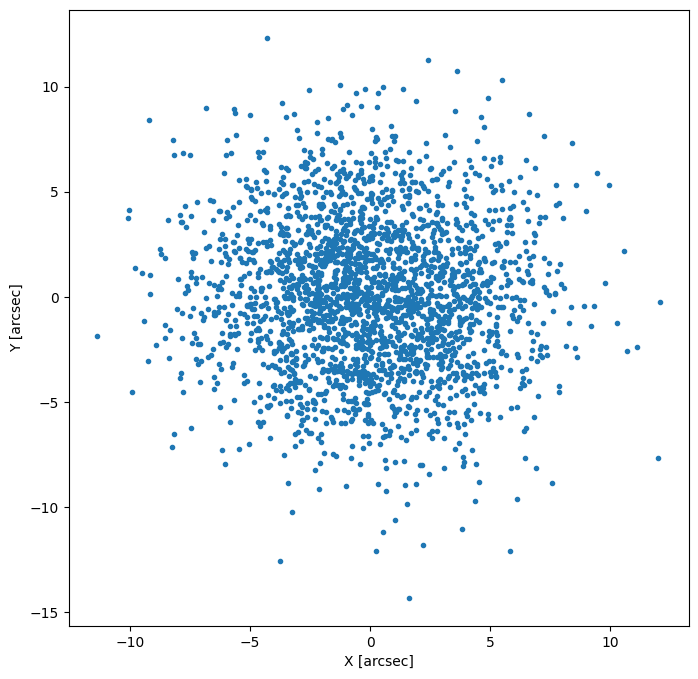

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(src.fields[0]["x"], src.fields[0]["y"], '.')
plt.xlabel("X [arcsec]")
plt.ylabel("Y [arcsec]")

In [ ]:
import astropy

In [ ]:
from astropy.table import QTable
import astropy.units as u
import numpy as np


In [ ]:
pip install astropy astroquery matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u


     SOURCE_ID              ra        ... phot_g_mean_mag    bp_rp    
                           deg        ...       mag           mag     
------------------- ----------------- ... --------------- ------------
4662919794243475840  72.7660842539151 ...        21.10991           --
4662919003978495488 72.82551465050375 ...        16.21827    1.8037281
4662923505095502080 73.24361411726106 ...       20.848244  -0.29154396
4662915018242323840 73.15924806671195 ...       20.814703   0.23135567
4662918007537116288 73.01395758290441 ...       20.276127   0.86989784
4662937386430040960 72.18974073577743 ...       18.685677      0.89114
4662925253162516224 73.02975371282093 ...        18.94579    1.2791443
4662874847410814976 68.77607885434055 ...       16.293564    0.9358797
4662924222356262528 73.23873690368688 ...       17.773794   -0.1875019
4662930338390336768 72.94207524304505 ...        20.27316   0.47165298
                ...               ... ...             ...          ...
466294

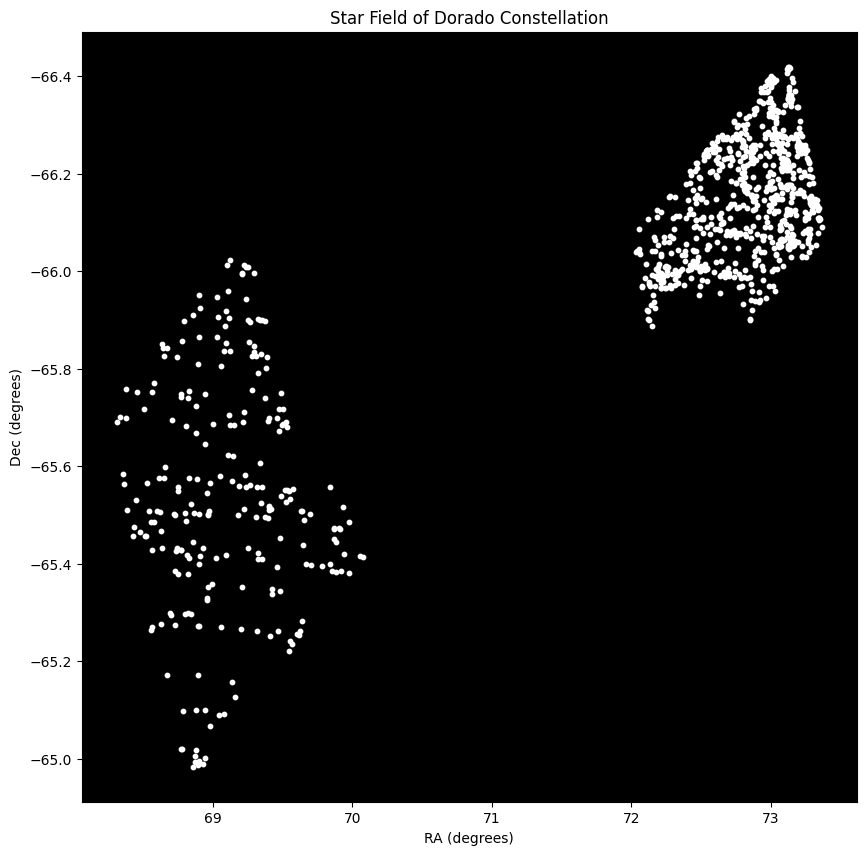

In [ ]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord

# Define the query for Gaia
query = """
SELECT TOP 1000
    source_id,
    ra,
    dec,
    phot_g_mean_mag,
    bp_rp
FROM gaiadr2.gaia_source
WHERE CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', 75.0, -65.0, 5)
)=1
"""

# Execute the query
job = Gaia.launch_job(query)
result = job.get_results()

# Convert the results to an Astropy table
star_table = Table(result)

# Display the table
print(star_table)

# Plot the star field
plt.figure(figsize=(10, 10))
plt.scatter(star_table['ra'], star_table['dec'], s=10, c='white')
plt.gca().invert_yaxis()  # Invert y-axis to match astronomical convention
plt.gca().set_facecolor('black')  # Set the background color to black
plt.title('Star Field of Dorado Constellation')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.show()


     SOURCE_ID              ra        ... phot_g_mean_mag    bp_rp   
                           deg        ...       mag           mag    
------------------- ----------------- ... --------------- -----------
4650814927136960000 85.85262033910165 ...       20.839825  0.73988724
4650808085281396608 86.39271577504434 ...        20.62958  0.49964714
4650808394493643008 86.49425140095568 ...       20.585037  0.30471802
4650809871987381248 86.65624210169915 ...       20.470694          --
4650805272060164608 87.11597358981999 ...       19.857107   1.1211338
4650806577730105216 86.88168555052404 ...       18.912148  0.33413315
4650810013700362368 86.51761427553822 ...        20.93511   0.7413807
4650810249919557632  86.4551981957551 ...        19.72775  0.12936592
4650804756660599424 87.11455398622944 ...       20.894976 0.027791977
4650811388085230464  85.9027602275617 ...        20.83379   0.7212105
                ...               ... ...             ...         ...
4650814063847213440 

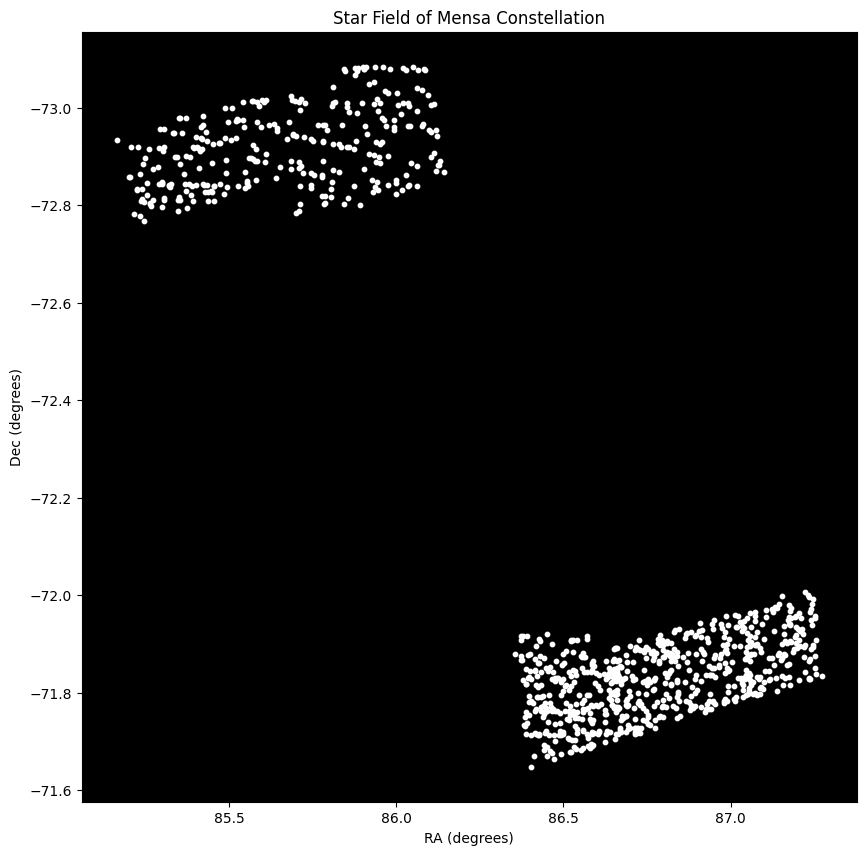

In [ ]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord

# Define the query for Gaia
query = """
SELECT TOP 1000
    source_id,
    ra,
    dec,
    phot_g_mean_mag,
    bp_rp
FROM gaiadr2.gaia_source
WHERE CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', 90.0, -75.0, 5)
)=1
"""

# Execute the query
job = Gaia.launch_job(query)
result = job.get_results()

# Convert the results to an Astropy table
star_table = Table(result)

# Display the table
print(star_table)

# Plot the star field
plt.figure(figsize=(10, 10))
plt.scatter(star_table['ra'], star_table['dec'], s=10, c='white')
plt.gca().invert_yaxis()  # Invert y-axis to match astronomical convention
plt.gca().set_facecolor('black')  # Set the background color to black
plt.title('Star Field of Mensa Constellation')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.show()


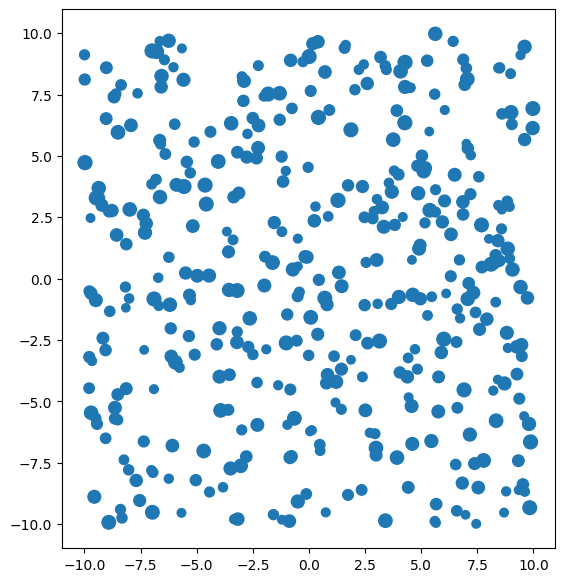

In [ ]:
from scopesim_templates.stellar import star_field, star_grid

field = star_field(n=400, mmin=15, mmax=25, width=20, height=20, filter_name="Ks")
grid = star_grid(n=400, mmin=15, mmax=25, separation=1 , filter_name="Ks")

plt.figure(figsize=(14, 7))
plt.subplot(121)

size =  np.log10(field.fields[0]["weight"])**2
plt.scatter(field.fields[0]["x"], field.fields[0]["y"], s=size, marker="o")